In [45]:
!wget https://huggingface.co/datasets/Aurthor/fake_job_post_prediction/resolve/main/balanced_fake_job_postings.csv

--2025-04-11 08:38:29--  https://huggingface.co/datasets/Aurthor/fake_job_post_prediction/resolve/main/balanced_fake_job_postings.csv
Resolving huggingface.co (huggingface.co)... 3.163.189.114, 3.163.189.74, 3.163.189.37, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.114|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/ce/05/ce054b8076adc04fcf207eb88e6b72a27cf652c3b239c3f08ff3dffeef71d854/b5065aec41ae9dd237fc627ecd5674e5b7203a538cc85092a00d18aa51e5bc88?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27balanced_fake_job_postings.csv%3B+filename%3D%22balanced_fake_job_postings.csv%22%3B&response-content-type=text%2Fcsv&Expires=1744364309&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDM2NDMwOX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2NlLzA1L2NlMDU0YjgwNzZhZGMwNGZjZjIwN2ViODhlNmI3MmEyN2NmNjUyYzNiMjM5YzNmMDhmZjNkZmZlZWY3MWQ4NTQvYjUwNjVh

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('balanced_fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1422,Maintenance Technician,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",Qualified candidates should possess the follow...,Our company offers a competitive salary plus B...,0,1,1,Full-time,Not Applicable,Unspecified,Financial Services,Other,0
1,9848,Software Engineer | Forecasting & Optimization,"US, CA, San Mateo",Engineering,NaN,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,Software Engineer | Forecasting + Optimization...,Desired Skills &amp; Experience:BS in Computer...,Our core values drive our culture. This is wha...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Engineering,1
2,8711,Applications Administrator,"GR, I, Athens",Operations,NaN,Upstream’s mission is to revolutionise the way...,The application administrator is responsible f...,"Knowledge, Skills and Experience● Very go...",Includes attractive competitive base salary an...,0,1,0,Full-time,Entry level,Bachelor's Degree,Telecommunications,Information Technology,0
3,3346,customer service representative,"US, CA, san jose",admin,13-20,NaN,What we're looking for:Do you like helping oth...,"The right candidate will:- Be upbeat, person...","Benefit includes: health and welfare coverage,...",0,0,0,Full-time,Entry level,High School or equivalent,Accounting,Customer Service,1
4,15390,Outside Sales | Design Consultant,"US, CA, Sacramento",NaN,NaN,NaN,We are seeking career minded and driven sales ...,"You must have Drive, Determination and Desire ...",Professional Sales TrainingCar allowance and f...,0,1,0,Full-time,Not Applicable,High School or equivalent,Building Materials,Sales,0


In [48]:
df_nlp = df[['title', 'description', 'fraudulent']].copy()
df_nlp.columns = ['title', 'description', 'label']
df_nlp.head(10)

,title,description,label
0,Maintenance Technician,"Tidewater Finance Company, located in Virginia...",0
1,Software Engineer | Forecasting & Optimization,Software Engineer | Forecasting + Optimization...,1
2,Applications Administrator,The application administrator is responsible f...,0
3,customer service representative,What we're looking for:Do you like helping oth...,1
4,Outside Sales | Design Consultant,We are seeking career minded and driven sales ...,0
5,Intern Project Developer,We Are Looking for Interns for Project Develop...,1
6,Graduates: English Teacher Abroad,"Play with kids, get paid for it :-)Love travel...",0
7,Financial Analyst,The Finacial Analyst will be based in our Redm...,0
8,Customer Service Representative,"Experienced, reliable team members are needed ...",1
9,Controls Engineer,(We have more than 1500+ Job openings in our w...,0


In [49]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)   # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)   # Remove mentions, hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)   # Remove most special characters
    text = re.sub(r'mso\S+|ascii\S+|font\S+|times new roman|calibri|minorlatin|engt|ntte\d+q|c\s+', '', text) # Remove specific formatting strings
    text = re.sub(r'email\w+|phonew+', '', text) # Remove potential email and phone placeholders
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text.strip()

In [50]:
df_nlp['description'][0]

'Tidewater Finance Company, located in Virginia Beach, VA has overnight full-time positions available for Maintenance Technicians.\xa0Qualified candidates should possess the following characteristics including, but not limited to:\xa0Minimum of 2 years of maintenance and janitorial experienceKnowledge of standard methods and practices of janitorial servicesUnderstanding of occupational hazards and safety rules to include proper use of chemicals and pesticidesAbility to operate and use janitorial tools, equipment \xa0and supplies such as floor buffers, vacuum cleaners and cleaning compounds and solutions\xa0The duties for this position could include, but are not limited to:\xa0Clean and service restroomsSweep, vacuum and mop floors; scrub, strip, sanitize, wax and buff floors using powered machinesInspect doors, windows and locks to ensure they are properly and securely fastened and report all security vulnerabilitiesPerform a variety of maintenance activities to include; carpentry, pai

In [51]:
df_nlp['description'] = df_nlp['description'].apply(clean_text)
df_nlp['title'] = df_nlp['title'].apply(clean_text)
df_nlp['description'][0]

'Tidewater Finance Company located in Virginia Beach VA has overnight fulltime positions available for Maintenance Technicians Qualified candidates should possess the following characteristics including but not limited to Minimum of 2 years of maintenance and janitorial experienceKnowledge of standard methods and practices of janitorial servicesUnderstanding of occupational hazards and safety rules to include proper use of chemicals and pesticidesAbility to operate and use janitorial tools equipment and supplies such as floor buffers vacuum cleaners and cleaning compounds and solutions The duties for this position could include but are not limited to Clean and service restroomsSweep vacuum and mop floors scrub strip sanitize wax and buff floors using powered machinesInspect doors windows and locks to ensure they are properly and securely fastened and report all security vulnerabilitiesPerform a variety of maintenance activities to include carpentry painting drywall and carpet and tile 

In [52]:
df_nlp.label.value_counts()

,count
label,
0,17014
1,11342


In [53]:
df_nlp['text'] = df_nlp['title'] + ' ' + df_nlp['description']
df_nlp =df_nlp[['text', 'label']]
df_nlp.head(10)

,text,label
0,Maintenance Technician Tidewater Finance Compa...,0
1,Software Engineer Forecasting Optimization Sof...,1
2,Applications Administrator The application adm...,0
3,customer service representative What were look...,1
4,Outside Sales Design Consultant We are seeking...,0
5,Intern Project Developer We Are Looking for In...,1
6,Graduates English Teacher Abroad Play with kid...,0
7,Financial Analyst The Finacial Analyst will be...,0
8,Customer Service Representative Experienced re...,1
9,Controls Engineer We have more than 1500 Job o...,0


In [54]:
df_nlp.dropna(inplace=True)
df_nlp = df_nlp[df_nlp['text'].str.strip() != '']
df_nlp.reset_index(drop=True, inplace=True)

In [55]:
df_nlp.head(20)

,text,label
0,Maintenance Technician Tidewater Finance Compa...,0
1,Software Engineer Forecasting Optimization Sof...,1
2,Applications Administrator The application adm...,0
3,customer service representative What were look...,1
4,Outside Sales Design Consultant We are seeking...,0
5,Intern Project Developer We Are Looking for In...,1
6,Graduates English Teacher Abroad Play with kid...,0
7,Financial Analyst The Finacial Analyst will be...,0
8,Customer Service Representative Experienced re...,1
9,Controls Engineer We have more than 1500 Job o...,0


In [56]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [57]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [58]:
X = df_nlp['text'].tolist()
y = df_nlp['label'].tolist()

In [59]:
X_embeddings = embedder.encode(X, show_progress_bar=True)

Batches:   0%|          | 0/887 [00:00<?, ?it/s]

In [60]:
pd.DataFrame(X_embeddings[:2])

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.063284,0.003240,0.069593,-0.049039,-0.017034,0.005385,0.008891,-0.032807,-0.113467,-0.031761,...,-0.038247,0.105756,0.042980,-0.058360,0.053740,0.058739,-0.029364,-0.004415,0.061350,-0.009836
1,-0.074356,0.001175,-0.015897,0.071251,-0.018824,-0.090536,0.033612,0.021952,-0.126041,0.006626,...,0.076870,0.042452,-0.015705,-0.000442,-0.007009,0.021755,0.021568,-0.073072,-0.034015,0.069588


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2,stratify=y, random_state=42)

In [62]:
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [63]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = GradientBoostingClassifier()
model3 = MLPClassifier(max_iter=300, random_state=42, hidden_layer_sizes=(100,))
model4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [64]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3403
           1       1.00      1.00      1.00      2269

    accuracy                           1.00      5672
   macro avg       1.00      1.00      1.00      5672
weighted avg       1.00      1.00      1.00      5672



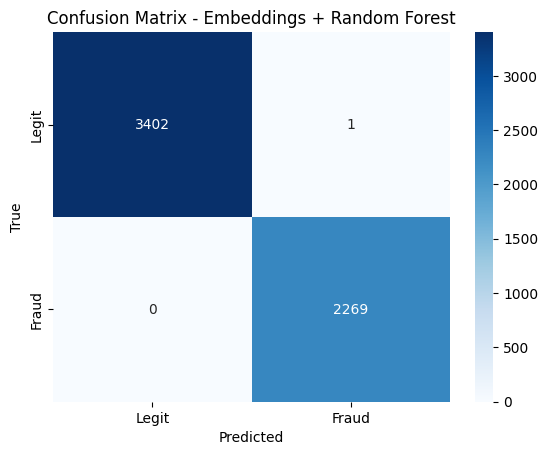

In [66]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix - Embeddings + Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [67]:
y_pred2= model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3403
           1       0.95      0.91      0.93      2269

    accuracy                           0.94      5672
   macro avg       0.94      0.94      0.94      5672
weighted avg       0.94      0.94      0.94      5672



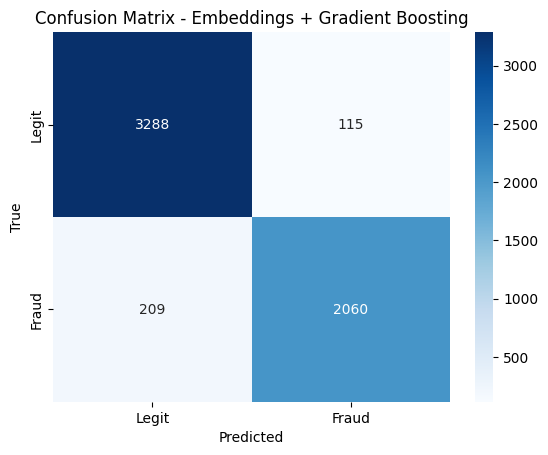

In [68]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix - Embeddings + Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [69]:
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3403
           1       0.98      1.00      0.99      2269

    accuracy                           0.99      5672
   macro avg       0.99      0.99      0.99      5672
weighted avg       0.99      0.99      0.99      5672



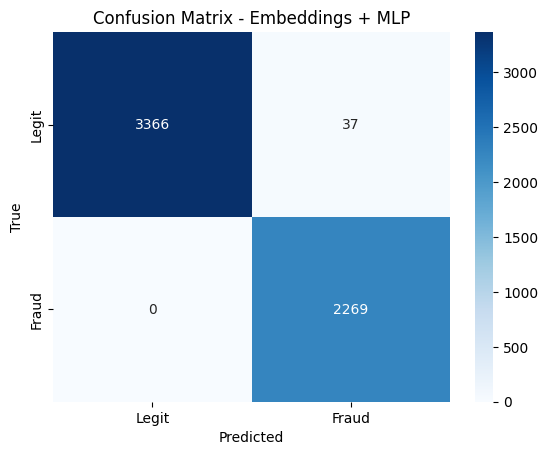

In [70]:
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix - Embeddings + MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [71]:
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3403
           1       1.00      1.00      1.00      2269

    accuracy                           1.00      5672
   macro avg       1.00      1.00      1.00      5672
weighted avg       1.00      1.00      1.00      5672



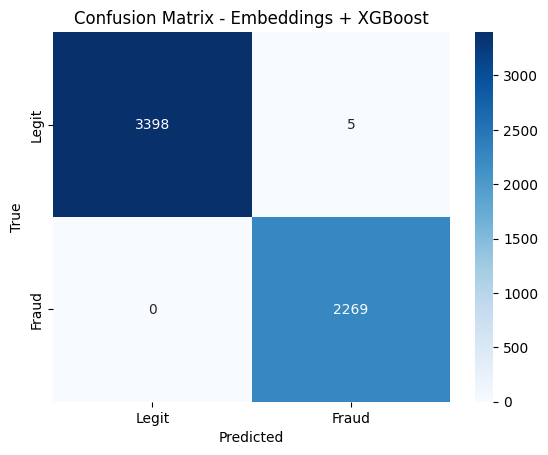

In [72]:
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix - Embeddings + XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [79]:
import joblib

In [80]:
joblib.dump(model1, 'embedding_random_forest_job_fraud.joblib')
joblib.dump(model2, 'embedding_gradient_boosting_job_fraud.joblib')
joblib.dump(model3, 'embedding_mlp_job_fraud.joblib')
joblib.dump(model4, 'embedding_xgboost_job_fraud.joblib')

['embedding_xgboost_job_fraud.joblib']

In [83]:
joblib.dump(model3, 'embedding_mlp_job_fraud.joblib')

['embedding_mlp_job_fraud.joblib']

In [82]:
joblib.dump(model2, 'embedding_gradient_boosting_job_fraud.joblib')

['embedding_gradient_boosting_job_fraud.joblib']

In [81]:
joblib.dump(model1, 'embedding_random_forest_job_fraud.joblib')

['embedding_random_forest_job_fraud.joblib']

In [75]:
embedder.save('embedding_model')

In [76]:
!ls -lh embedding_model

total 88M
drwxr-xr-x 2 root root 4.0K Apr 11 08:50 1_Pooling
drwxr-xr-x 2 root root 4.0K Apr 11 08:50 2_Normalize
-rw-r--r-- 1 root root  617 Apr 11 08:50 config.json
-rw-r--r-- 1 root root  205 Apr 11 08:50 config_sentence_transformers.json
-rw-r--r-- 1 root root  87M Apr 11 08:50 model.safetensors
-rw-r--r-- 1 root root  349 Apr 11 08:50 modules.json
-rw-r--r-- 1 root root  11K Apr 11 08:50 README.md
-rw-r--r-- 1 root root   53 Apr 11 08:50 sentence_bert_config.json
-rw-r--r-- 1 root root  695 Apr 11 08:50 special_tokens_map.json
-rw-r--r-- 1 root root 1.5K Apr 11 08:50 tokenizer_config.json
-rw-r--r-- 1 root root 695K Apr 11 08:50 tokenizer.json
-rw-r--r-- 1 root root 227K Apr 11 08:50 vocab.txt


In [77]:
import shutil

shutil.make_archive('embedding_model', 'zip', 'embedding_model')

'/content/embedding_model.zip'

In [78]:
from google.colab import files

files.download('embedding_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
files.download('embedding_random_forest_job_fraud.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>